# CÁC PHƯƠNG PHÁP TRỰC QUAN HÓA DỮ LIỆU SỬ DỤNG PYTHON
**Trực quan hóa dữ liệu là việc biểu diễn đồ họa các thông tin trừu tượng nhằm 2 mục đích: Phân tích dữ liệu và truyền thông. Dữ liệu thường chứa đựng trong đó nhiều câu chuyện quan trọng và trực quan hóa dữ liệu là một công cụ mạnh mẽ để khám phá và thấu hiểu những câu truyện này, và sau đó là truyền đạt tới những người khác. **

> ***"Một bức tranh bằng cả nghìn lời nói"***



---
* Sử dụng các thư viện của Python để trình bày dữ liệu một cách trực quan, khoa học; 
* Từ việc trình bày dữ liệu đó có thể cho phép trích rút được các thông tin hữu ích **(insight)** từ tập dữ liệu khổng lồ 


----

## I. Trực quan hóa dữ liệu với thư viện Matplotlib
---
* Matplotlib là một thư viện dùng để vẽ đồ thị. Nó rất hữu ích cho bất kỳ nhà khoa học dữ liệu hoặc bất kỳ nhà phân tích dữ liệu nào
* Chi tiết: https://matplotlib.org/index.html

![alt text](https://techmaster.vn/fileman/Uploads/ImageBlog/lap-trinh-python-10.jpg)


### I.1. Biểu đồ hình tròn (Pie)

**pie**(x, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

Các tham số cơ bản:
* x: Số liệu vẽ biểu đồ hình tròn (1 mảng, 1 list)
* explode: làm nổi bật môt phần nào đó trong biểu đồ
* labels: Nhãn của mỗi phần trong biểu đồ



[Chi tiết về biểu đồ Pie](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.pie.html?highlight=matplotlib%20pyplot%20pie#matplotlib.pyplot.pie)

[18.0, 23.0, 74.0, 80.0]
['DCCTMO59', 'DCCTKH60', 'DCCTKH61AB', 'DCCTKH62AB']


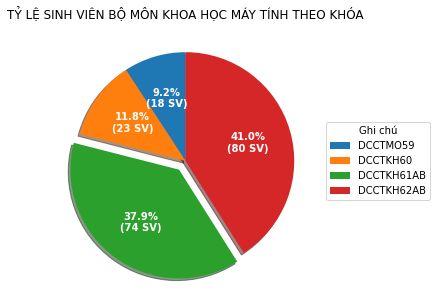

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Tạo dữ liệu mẫu kiểu list
recipe = ["18 DCCTMO59",
          "23 DCCTKH60",
          "74 DCCTKH61AB",
          "80 DCCTKH62AB"]

data = [float(x.split()[0]) for x in recipe]
ingredients = [x.split()[1] for x in recipe]
print(data)
print(ingredients)

#Hàm tính % số liệu và tạo chuỗi hiển thị trên biểu đồ
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} SV)".format(pct,absolute)

#Vẽ biểu đồ hình tròn
fig, ax = plt.subplots(figsize=(10,5), subplot_kw = dict(aspect = "equal"))

wedges, texts, autotexts = ax.pie(data, explode=(0,0,0.1,0), autopct= lambda pct: func(pct, data),
                                 shadow=True, startangle=90, textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="Ghi chú",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10, weight="bold")

ax.set_title("TỶ LỆ SINH VIÊN BỘ MÔN KHOA HỌC MÁY TÍNH THEO KHÓA")

plt.show()

### I.2. Biểu đồ dạng đường (line) - plot()
>>> plot(x, y, 'go--', linewidth=2, markersize=12)

>>> plot(x, y, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)

Trong đó:

  * X, Y – các tọa độ theo trục x và y;
  
Hàm pyplot.plot() còn có các tham số cơ bản sau:

                * color = [ ‘b’ | ‘g’ | ‘r’ | ‘c’ | ‘m’ | ‘y’ | ‘k’ | ‘w’ ];
                * linewidth = số thực - Độ rộng của đường đồ thị
                * linestyle =  [ ‘-‘ | ‘- -‘ | ‘-.’ | ‘:’ | ‘None’ ]; Kiểu đường đồ thị
                * marker = [ ‘.’ | ‘,’ | ‘o’ | ‘+’ | ‘x’ ] 
                * markersize = float:  Kích thước của điểm dữ liệu
                * label = String;

Các tham số color, marker, linestyple có thể được biễu diễn ở dạng ‘[color][marker][linestyle]‘, ví dụ: ‘ro-‘ tương đương với color=’r’, marker=’o’, linestyle=’-‘.

[Chi tiết các tham số và ví dụ của biểu đồ dạng đường](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot)


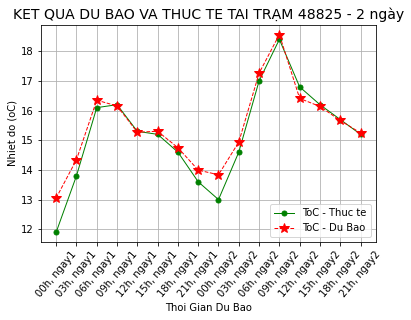

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Trực quan hóa dữ liệu thực tế và dữ liệu dự đoán 
y_predict = np.array([[13.054178 ],
 [14.343403 ],
 [16.351606 ],
 [16.15559  ],
 [15.2708435],
 [15.303351 ],
 [14.749125 ],
 [13.993933 ],
 [13.836435 ],
 [14.939316 ],
 [17.261557 ],
 [18.564793 ],
 [16.410744 ],
 [16.139223 ],
 [15.666636 ],
 [15.247297 ]])

y_actual = np.array([[11.89999962],
 [13.80000019],
 [16.10000038],
 [16.20000076],
 [15.30000019],
 [15.19999981],
 [14.60000038],
 [13.60000038],
 [13.        ],
 [14.60000038],
 [17.        ],
 [18.39999962],
 [16.79999924],
 [16.20000076],
 [15.69999981],
 [15.19999981]])

#Xử lý thời gian trục X hiển thị

n = int(len(y_predict)/8)
x_time = []
step = ['00','03','06','09','12','15','18','21']

for i in range(n):
    for j in step:
        st = j + 'h, ngay' + str(i+1)
        x_time.append(st)
x_time = pd.Series(np.ravel(x_time))

#Hiển thị kết quả dự báo và dữ liệu thực tế tại trạm quan trắc trong 2 ngày đầu tiên
plt.title("KET QUA DU BAO VA THUC TE TAI TRẠM 48825 - 2 ngày", fontsize=14)
plt.plot(x_time, y_actual, color='green', marker='o', linestyle='-', linewidth=1, markersize=5, label="ToC - Thuc te" )
plt.plot(x_time, y_predict, color='red', marker='*', linestyle='dashed', linewidth=1, markersize=10, label="ToC - Du Bao" )
plt.legend(loc="lower right") #chỉnh vị trí của chú thích ở đây là góc phải bên dưới
plt.xlabel("Thoi Gian Du Bao")
plt.ylabel("Nhiet do (oC)")
plt.grid(True)
plt.xticks(rotation=50) #chỉnh góc nghiêng của label trên trục x
plt.show()

### I.3 Biểu đồ scatter
----
pyplot.scatter() được sử dụng để vẽ biểu đồ scatter, với các tham số cơ bản sau:

* s – marker size, scalar hoặc array có số phần tử tương đương với số điểm trên đồ thị;

* c – marler color = [ ‘b’ | ‘g’ | ‘r’ | ‘c’ | ‘m’ | ‘y’ | ‘k’ | ‘w’ ];

* marker – tương tự với pyplot.plot()

* alpha – độ mờ đục, trong khoảng [0.0, 1.0].

[Chi tiết các tham số và ví dụ của biểu đồ scatter](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sizes = [700, 650, 720, 630, 710, 640, 600, 640, 670]
prices = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels = ["$175", "$170", "$205", "$120", "$220", "$130", "$105", "$145", "$190"]

plt.scatter(sizes, prices, marker='s', s=50, color='m', alpha=0.5)
#label each point
